# Jamboree Case Study

## Problem Statement

We are given a Jamboree dataset which contains student's data and labelled with chance of Admission, our task is to create a model to predict the chance of admit for the students, provide insights that which parameter is important for increasing the chance of admit.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('jamboree_admission.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df['Serial No.'].nunique()

500

In [6]:
df.drop(columns = 'Serial No.', inplace = True)

In [7]:
df.rename(columns = {'GRE Score' : 'GRE_Score', 'TOEFL Score': 'TOEFL_Score',
                     'University Rating': 'University_Rating', 'LOR ' : 'LOR', 'Chance of Admit ' : 'Chance_of_Admit'}, inplace = True)

In [8]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          500 non-null    int64  
 1   TOEFL_Score        500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE_Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL_Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University_Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance_of_Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


### Univariate Analysis

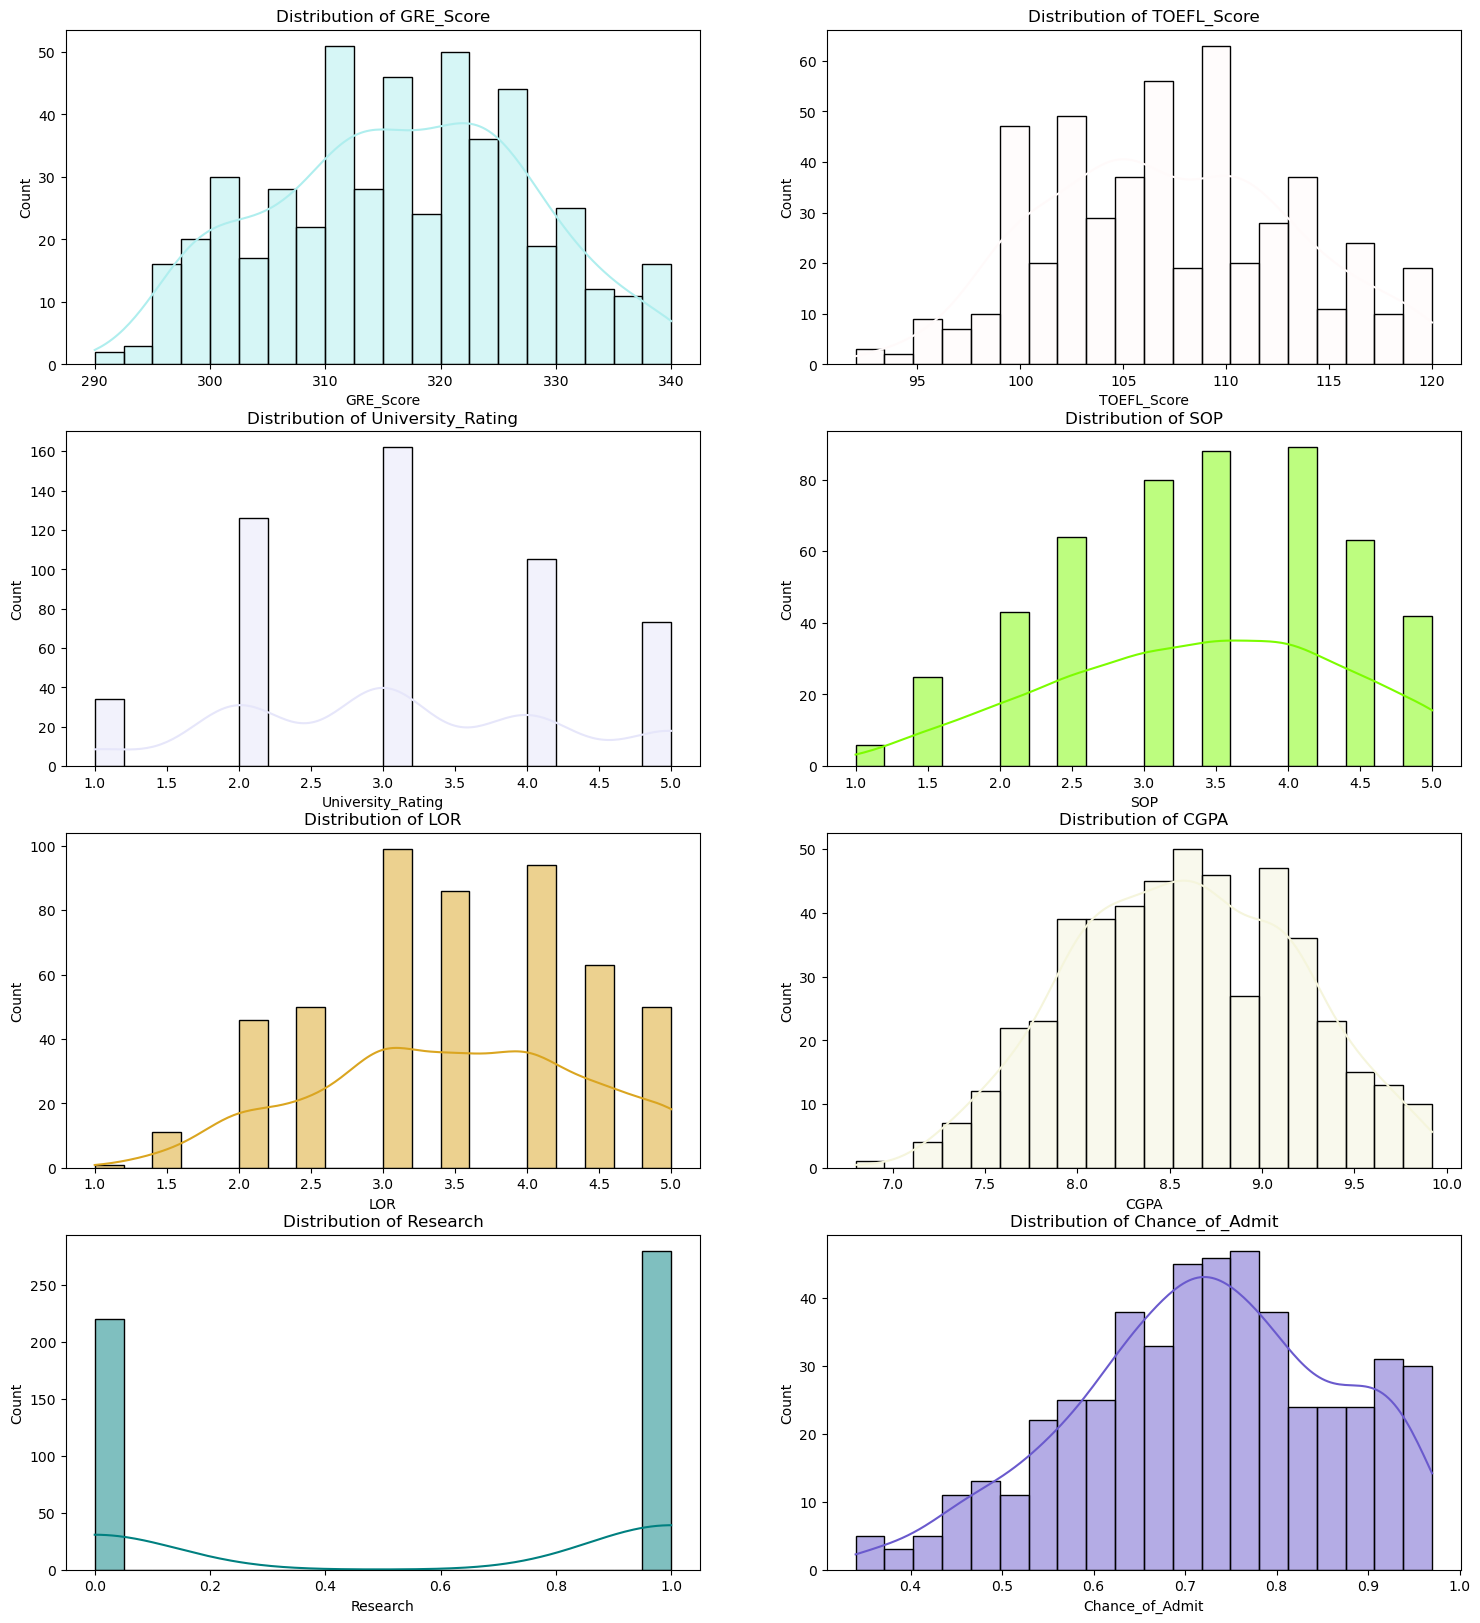

In [11]:
numerical_cols = list(df.columns)

plt.figure(figsize = (18,20))

for i in range(len(numerical_cols)):
    plt.subplot(4,2,i+1)
    clr = np.random.choice(list(mc.cnames))
    sns.histplot(data = df, x = numerical_cols[i], bins = 20, kde = True, color = clr)
    plt.title(f'Distribution of {numerical_cols[i]}')
    plt.plot()

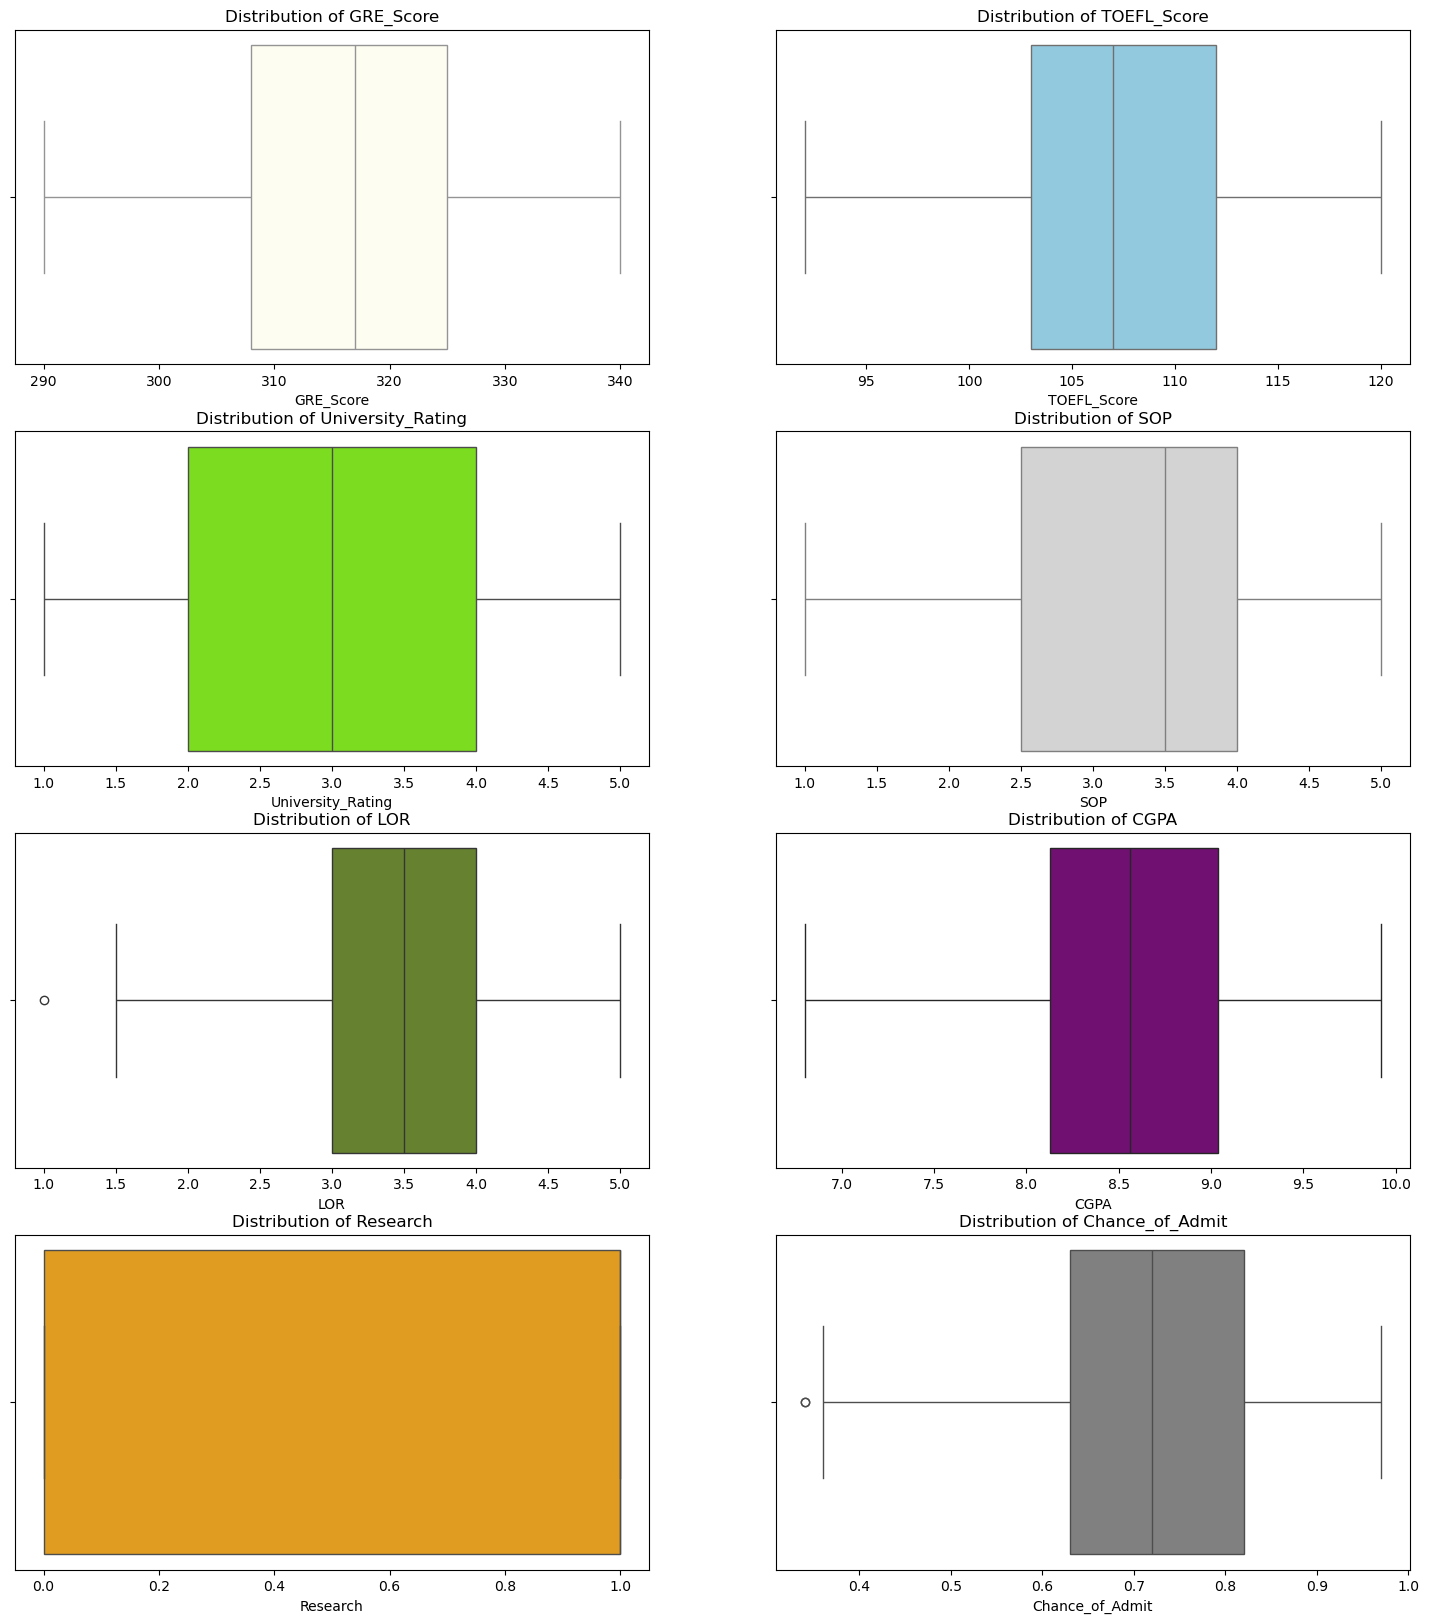

In [12]:
plt.figure(figsize = (18,20))

for i in range(len(numerical_cols)):
    plt.subplot(4,2,i+1)
    clr = np.random.choice(list(mc.cnames))
    sns.boxplot(data = df, x = numerical_cols[i], color = clr)
    plt.title(f'Distribution of {numerical_cols[i]}')
    plt.plot()

### Bivariate Analysis

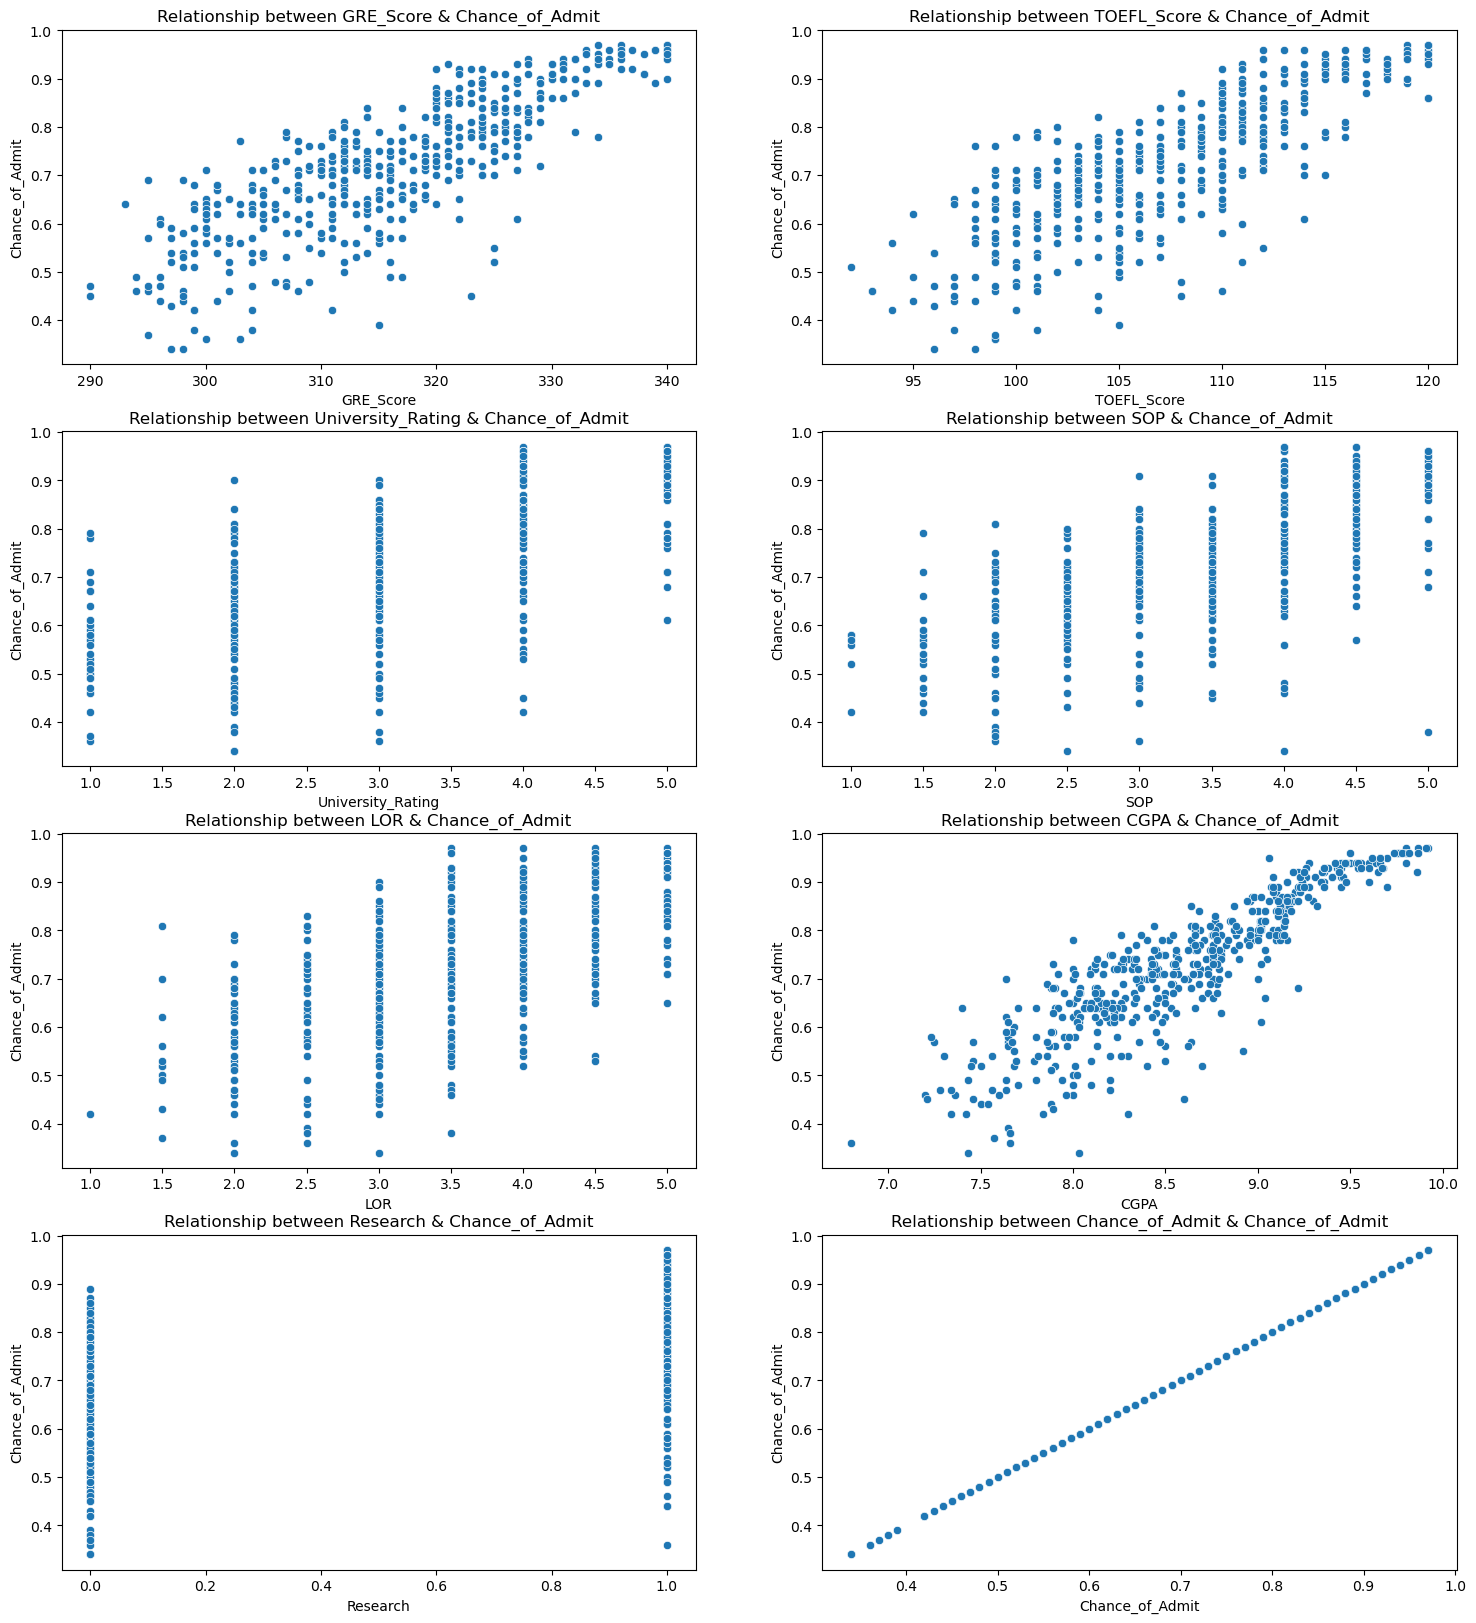

In [13]:
#Check relationship between each feature and target variable

plt.figure(figsize = (18,20))
for i in range(len(numerical_cols)):
    plt.subplot(4,2,i+1)
    sns.scatterplot(data = df, x = numerical_cols[i], y = 'Chance_of_Admit')
    plt.title(f'Relationship between {numerical_cols[i]} & Chance_of_Admit')
    plt.plot()

### Multivariate Analysis

In [14]:
# Correlation between features

df.corr()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE_Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


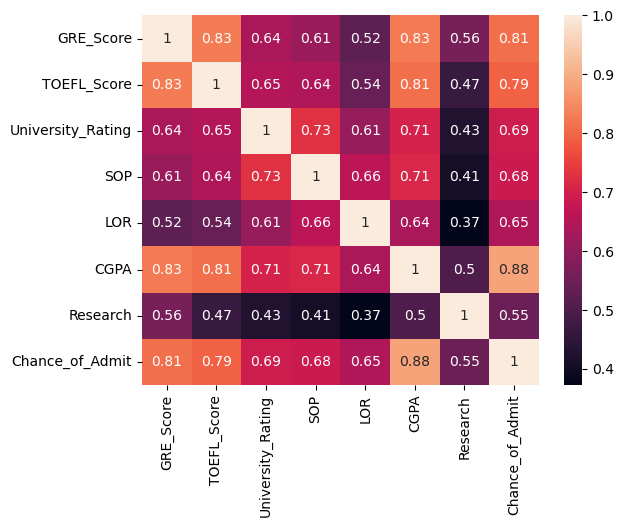

In [15]:
# Heatmap of correlation between features

sns.heatmap(df.corr(), annot = True);

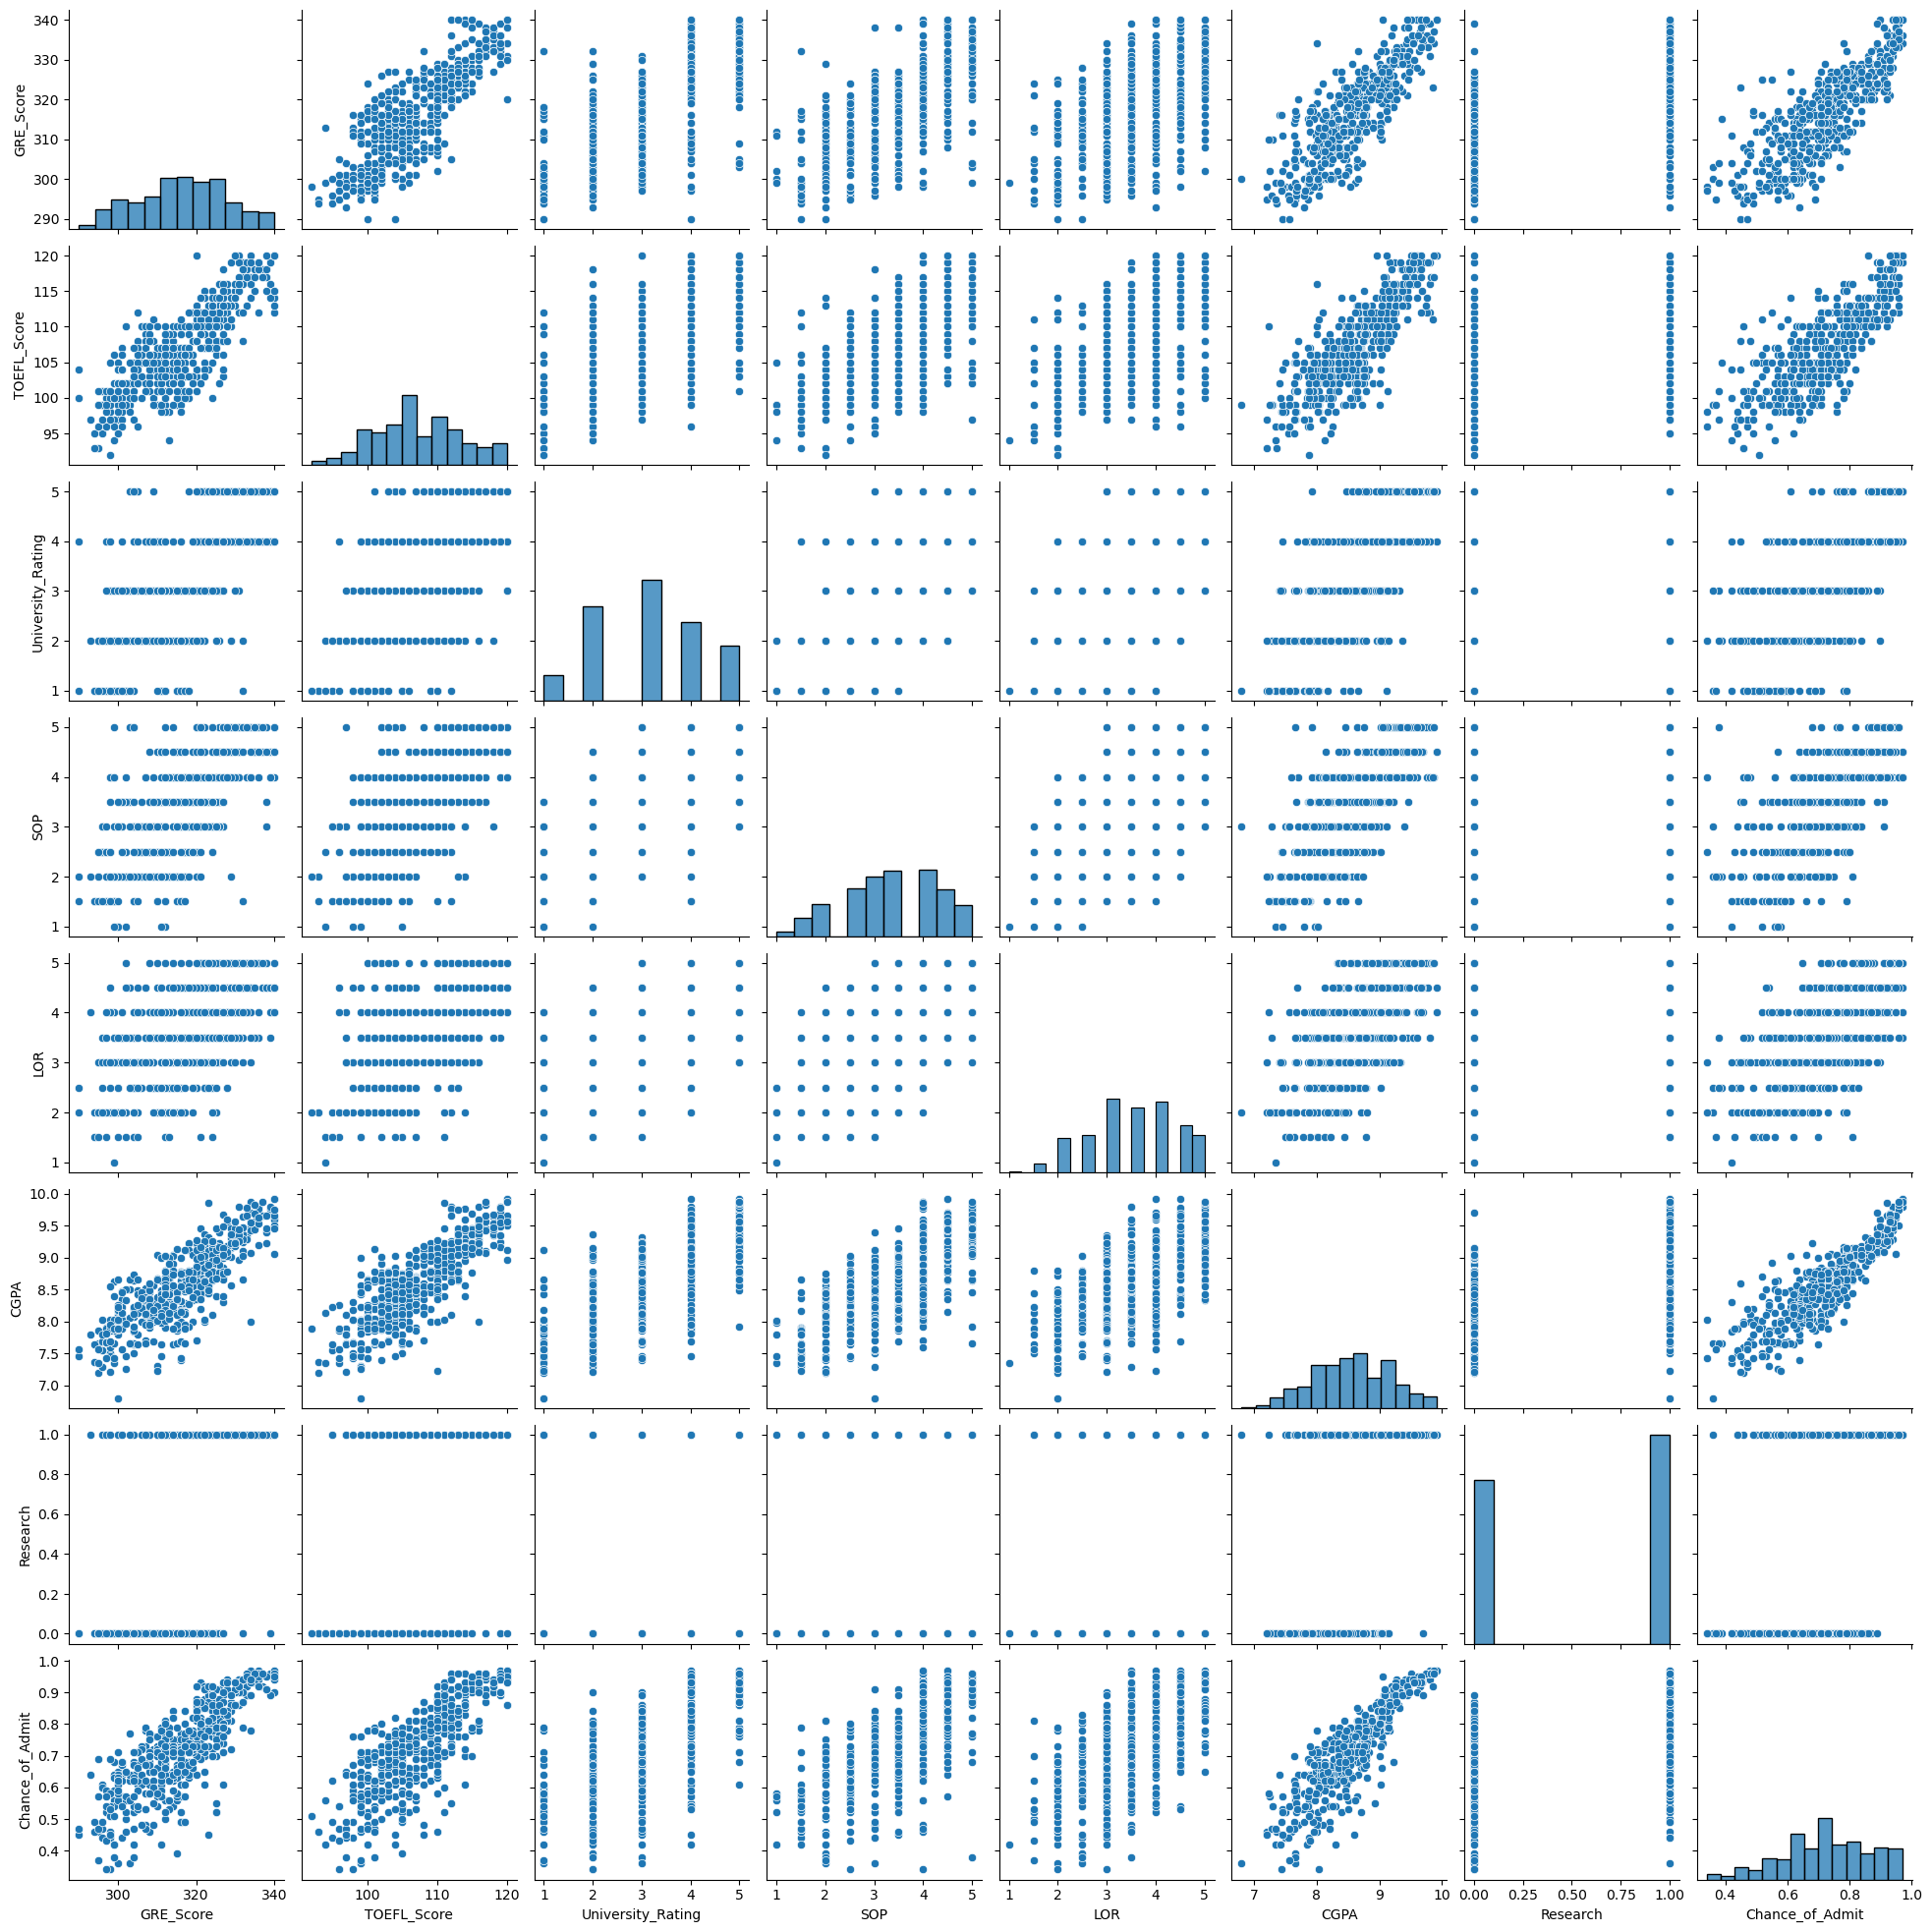

In [16]:
# Pairplot to check the correlation among features

sns.pairplot(data = df);

## Insights Based on EDA

### Comments on Range of Attributes

* Sr. No. - It is unique row ID assciated with each row ranging from 1 to 500
* GRE Score - It is score obtained by student in GRE out of 340, ranging from 290 to 340
* TOEFL Score - It is score obtained by student in TOEFL out of 120, ranging from 92 to 120
* University Rating - It is rating for university out of 5, ranging from 1 to 5
* SOP -  It is points based on statement of Purpose out of 5, ranging from 1 to 5
* LOR - It is points based on Letter of Recommendation out of 5, ranging from 1 to 5
* CGPA - It is GPA obtained by student out of 10, ranging from 6.80 to 9.92
* Research - If student has research experience or not, given by 0 or 1
* Chace of Admit - It is our target feature gives chances of admission based on students score in given features, ranging from 0.37 to 0.94

### Comments on the distribution of Variables and relationship between them

* Based on heatmap, we can observe that each variables are highly correlated with each others except research
* We can observe that values of features are increasing along with other features, which can conclude that brilliant student can perform well in one test can perform well in other test as well.
* Features has peak values around median values of its ranges.

### Comments based on univariate and bivariate plots

* Based on boxplots of features, we have found there is no outliers in features except LOR and traget variable Chance of Admit.
* Based on plots between chance of admit and other features we can observe that features are linearly related with target variable.
* Based on plots most students have higher number of scores compared to number of students having lower scores.

## Data Preprocessing

#### Duplicate Value Check

In [17]:
# checking for duplicate values

df[df.duplicated()]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit


#### Missing Value Treatment

In [18]:
# Checking for missing values

df.isna().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

#### Outlier Treatment

In [19]:
# Handling outliers that were dectected using boxplot & IQR method

df.drop(df[df['LOR'] == 1].index, axis = 0, inplace = True)

#### Data Preparation For Modeling

In [20]:
# Splitting the dataset into separate datframes based on features and target variable

X = df.iloc[:, :-1]
y = df['Chance_of_Admit']

In [21]:
print('Shape of X :', X.shape)
print('Shape of y :', y.shape)

Shape of X : (499, 7)
Shape of y : (499,)


In [22]:
# Splitting the data into train test splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print('Shape of X_train :', X_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of y_test :', y_test.shape)

Shape of X_train : (399, 7)
Shape of X_test : (100, 7)
Shape of y_train : (399,)
Shape of y_test : (100,)


In [23]:
# Scaling the features before model building

scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [24]:
y_train = np.array(y_train)

## Model Building

In [25]:
# Statmodels default is without intercept, to add intercept we need to add constant.

X_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     263.8
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          7.79e-144
Time:                        11:54:24   Log-Likelihood:                 558.72
No. Observations:                 399   AIC:                            -1101.
Df Residuals:                     391   BIC:                            -1070.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2669      0.11

#### Observations :

- Statsmodel implementation of linear regression provide us the complete statistical summary of the model.
- Statsmodel implementation builds linear regression models for multiple number of times and create a sampling distribution of model coefficients for all the features and it estimates the standard error, t-statistic, p-value and confidence interval values from the sampling distribution.
- Statsmodel internally runs an hypothesis test which is a one sample t-test for which the null hypothesis is feature is not relevant and alternate hypothesis is the feature is relevant.
- If P-value > alpha(0.05) then the feature is not relevant.
- From the above results, we have two features university rating and SOP which are not relevant features.
- Confidence interval provide us a range estimate with 95% confidence where our model coefficient values lie.
- Performance metrics R-Squared score and Adjusted R-Squared score for the model were 0.825 and 0.822 which indicates the model is performing well.

## Testing the assumptions of the linear regression model

### Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) 

In [26]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_train_sc, columns = X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,CGPA,38.23
0,GRE_Score,28.85
1,TOEFL_Score,28.72
3,SOP,19.17
2,University_Rating,11.83
4,LOR,11.37
6,Research,3.38


In [27]:
cols2 = vif['Features'][1:].values
X2 = pd.DataFrame(X_train_sc, columns = X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)
sm_model = sm.OLS(y_train, X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     217.1
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          2.81e-121
Time:                        11:54:24   Log-Likelihood:                 502.75
No. Observations:                 399   AIC:                            -991.5
Df Residuals:                     392   BIC:                            -963.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3975      0.01

#### Observation :
- After dropping the feature **'CGPA'** which has the highest multi-collinearity, our model R2 score and Adjusted R2 score were dropped to **0.769 and 0.765**.

In [28]:
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,TOEFL_Score,25.55
0,GRE_Score,24.40
2,SOP,17.62
3,University_Rating,11.80
4,LOR,10.48
5,Research,3.38


In [29]:
cols3 = vif['Features'][1:].values
X3 = pd.DataFrame(X_train_sc, columns = X_train.columns)[cols3]

X3_sm = sm.add_constant(X3)
sm_model = sm.OLS(y_train, X3_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     234.2
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          1.86e-115
Time:                        11:54:24   Log-Likelihood:                 486.22
No. Observations:                 399   AIC:                            -960.4
Df Residuals:                     393   BIC:                            -936.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4093      0.01

#### Observation :
- After dropping the feature **'TOEFL_Score'** which has the highest multi-collinearity, our model R2 score and Adjusted R2 score were dropped slightly to **0.749 and 0.746**.

In [30]:
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,SOP,16.44
2,University_Rating,11.76
0,GRE_Score,11.75
3,LOR,10.38
4,Research,3.36


In [31]:
cols4 = vif['Features'][1:].values
X4 = pd.DataFrame(X_train_sc, columns = X_train.columns)[cols4]

X4_sm = sm.add_constant(X4)
sm_model = sm.OLS(y_train, X4_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     283.3
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          1.76e-114
Time:                        11:54:24   Log-Likelihood:                 481.00
No. Observations:                 399   AIC:                            -952.0
Df Residuals:                     394   BIC:                            -932.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4207      0.01

#### Observation :
- After dropping the feature **'SOP'** which has the highest multi-collinearity, our model R2 score and Adjusted R2 score were dropped slightly to **0.742 and 0.739**.

In [32]:
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,GRE_Score,10.64
0,University_Rating,9.40
2,LOR,8.30
3,Research,3.36


In [33]:
cols5 = vif['Features'][1:].values
X5 = pd.DataFrame(X_train_sc, columns = X_train.columns)[cols5]

X5_sm = sm.add_constant(X5)
sm_model = sm.OLS(y_train, X5_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     213.0
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           3.69e-82
Time:                        11:54:24   Log-Likelihood:                 402.65
No. Observations:                 399   AIC:                            -797.3
Df Residuals:                     395   BIC:                            -781.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4868      0.01

#### Observation :
- After dropping the feature **'GRE_Score'** which has the highest multi-collinearity, our model R2 score and Adjusted R2 score were dropped to **0.618 and 0.615**.

In [34]:
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,University_Rating,7.60
1,LOR,6.86
2,Research,2.83


In [35]:
cols6 = vif['Features'][1:].values
X6 = pd.DataFrame(X_train_sc, columns = X_train.columns)[cols6]

X6_sm = sm.add_constant(X6)
sm_model = sm.OLS(y_train, X6_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     225.9
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           3.51e-66
Time:                        11:54:24   Log-Likelihood:                 362.55
No. Observations:                 399   AIC:                            -719.1
Df Residuals:                     396   BIC:                            -707.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5082      0.012     43.470      0.0

#### Observation :
- After dropping the feature **'University_Rating'** which has the highest multi-collinearity, our model R2 score and Adjusted R2 score were dropped to **0.533 and 0.531**.

In [36]:
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,LOR,2.49
1,Research,2.49


#### Observation :
- Finally after dropping all the variables with VIF > 5, we were left with features **LOR, Research** which have VIF < 5.
- Our linear regression model built with features **LOR, Research** has R2 score and Adjusted R2 score of **0.533 and 0.531**.
- Here after dropping the variables having high value of VIF, we got lower value of R2 score and adjusted R2 score. Dropping the features based on high VIF is not a good idea.

- So, we will use regularization

### Regularization

In [37]:
# Splitting the data into train test splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print('Shape of X_train :', X_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of y_test :', y_test.shape)

Shape of X_train : (399, 7)
Shape of X_test : (100, 7)
Shape of y_train : (399,)
Shape of y_test : (100,)


In [38]:
# Scaling the features before model building

scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [39]:
#Initialize lasso regression with default alpha = 1

lasso_reg = Lasso()

#fit the model
lasso_reg.fit(X_train_sc, y_train)

#check the R2 sscore of the model
lasso_reg.score(X_test_sc, y_test)

-0.005048980765729905

In [40]:
#Calculating Adj R2 score

def adj_r2(X, y, r2_score):
    return 1 - ((1-r2_score)*(len(y) -1)) / (len(y) - X.shape[1] - 1)

In [41]:
#Adj R2 score for the lasso model
adj_r2(X_test_sc, y_test, lasso_reg.score(X_test_sc, y_test))

-0.08152009886747025

#### Observations :
- Lasso regression model with default value for alpha set as 1 provided us the R2 score and Adjusted R2 score as **-0.005 and -0.0815**.
- From the above scores, we can clearly see that with applying L1 regularization our model is clearly underfitting.

In [42]:
#Initialize elastic net regressor with default alpha = 1

elastic_reg = ElasticNet()

#fit the model
elastic_reg.fit(X_train_sc, y_train)

#Check the R2 score of the model
elastic_reg.score(X_test_sc, y_test)

-0.005048980765729905

In [43]:
#Adj R2 score for the elasticnet regression model
adj_r2(X_test_sc, y_test, elastic_reg.score(X_test_sc, y_test))

-0.08152009886747025

#### Observation :
- ElasticNet regression model with default value for alpha set as 1 provided us the R2 score and Adjusted R2 score as **-0.005 and -0.0815** same as the Lasso Regression model.
- - From the above scores, we can clearly see that with applying ElasicNet regularization our model is clearly underfitting.

In [44]:
#Intialize the Ridge regression with default alpha = 1

ridge_reg = Ridge()

#fit the model
ridge_reg.fit(X_train_sc, y_train)

#check the R2 score
ridge_reg.score(X_test_sc, y_test)

0.7943669502342133

In [45]:
#Adj R2 score for the Ridge regression model
adj_r2(X_test_sc, y_test, ridge_reg.score(X_test_sc, y_test))

0.7787209573172513

In [46]:
#check the performance on the training set
ridge_reg.score(X_train_sc, y_train)

0.8230009201124773

In [47]:
#Dataframe with features and weights

wt = pd.DataFrame()
wt['Features'] = X_train.columns
wt['Weights'] = ridge_reg.coef_
wt

,Features,Weights
0,GRE_Score,0.099536
1,TOEFL_Score,0.100781
2,University_Rating,0.033542
3,SOP,0.020241
4,LOR,0.059684
5,CGPA,0.302905
6,Research,0.022892


In [48]:
#Making predictions on the test data
y_pred = ridge_reg.predict(X_test_sc)

In [49]:
#Calculating the residuals or errors
error = y_test - y_pred

#### Observation :
- Ridge regression model with default value for alpha set as 1 provided us the R2 score and Adjusted R2 score as **0.794 and 0.7787** much better than Lasso or ElasticNet regression models.
- From the above scores, we can clearly see that with applying L2 regularization our model is performing well on both the test and training sets, hence we can say that our ridge resression model fit the data really well.

### Mean of Residuals

In [50]:
sum(y_test - y_pred) / len(y_test)

0.0011645584822793315

#### Observation :
- **Mean of the residuals is nearly zero**.

### Residual Plot

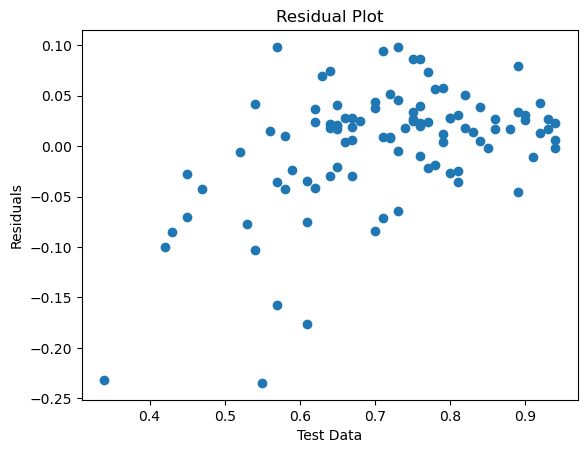

In [51]:
#Residuals plot

plt.scatter(x = y_test, y = error)
plt.xlabel('Test Data')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Normality of Residuals

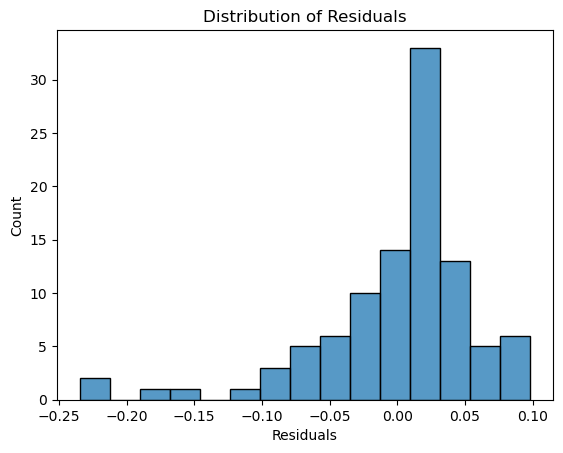

In [52]:
#Distribution of residuals

sns.histplot(x = error)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

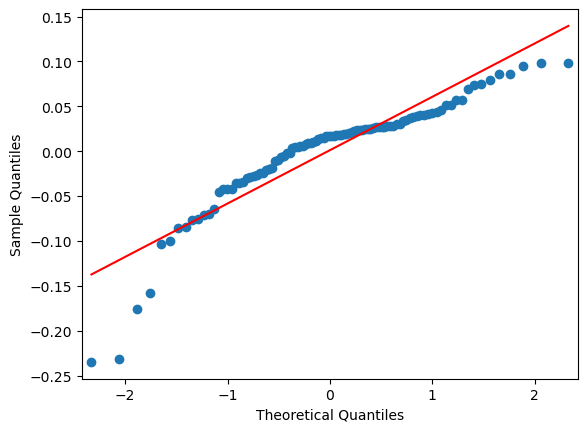

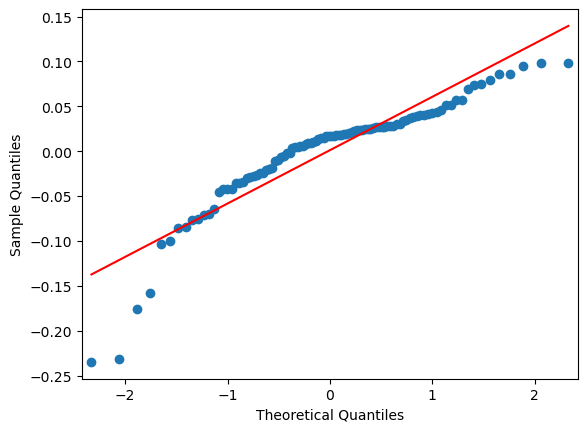

In [53]:
qqplot(error, line = 's')

#### Observations :
- Distribution of residuals is close to being a Bell Shaped Curve.
- Points in the qqplot are close to the line.

### Test for Homoscedasticity

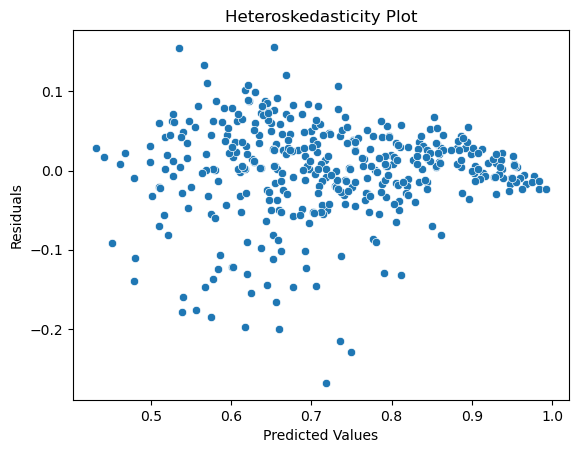

In [54]:
#Predictions on training set
predicted_values = ridge_reg.predict(X_train_sc)
residuals = y_train - predicted_values

#create a heteroskedasticity plot
sns.scatterplot(x = predicted_values, y = residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Heteroskedasticity Plot')
plt.show()

#### Observation :
- From the above heteroskedasticity plot, we can clearly see that even though the scale of predicted values increases the **variability in residuals remain almost constant between 0.1 and -0.1**.
- We can infer that the data is **homoskedastic** in nature.

## Model Performance Evaluation

### Mean Absolute Error

In [55]:
MAE_test = mean_absolute_error(y_test, y_pred)
MAE_train = mean_absolute_error(y_train, ridge_reg.predict(X_train_sc))

print(f'Mean Absolute Error for Test : {MAE_test}')
print(f'Mean Absolute Error for Train : {MAE_train}')

Mean Absolute Error for Test : 0.04240331492509621
Mean Absolute Error for Train : 0.04305915140779896


### Mean Squared Error

In [56]:
MSE_test = mean_squared_error(y_test, y_pred)
MSE_train = mean_squared_error(y_train, ridge_reg.predict(X_train_sc))

print(f'Mean Squared Error for Test : {MSE_test}')
print(f'Mean Squared Error for Train : {MSE_train}')

Mean Squared Error for Test : 0.0035305117750982946
Mean Squared Error for Train : 0.0036044493275203325


### Root Mean Squared Error

In [57]:
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE_train = np.sqrt(mean_squared_error(y_train, ridge_reg.predict(X_train_sc)))

print(f'Root Mean Squared Error for Test : {RMSE_test}')
print(f'Root Mean Squared Error for Train : {RMSE_train}')

Root Mean Squared Error for Test : 0.05941810982434812
Root Mean Squared Error for Train : 0.060037066280093435


### R2 Score

In [58]:
print("R2_Score for Test", ridge_reg.score(X_test_sc,y_test))
print("R2_score for Train", ridge_reg.score(X_train_sc, y_train))

R2_Score for Test 0.7943669502342133
R2_score for Train 0.8230009201124773


### Adjusted R2 Score

In [59]:
print(f'Adjusted R2 Score for Test : {adj_r2(X_test_sc,y_test,ridge_reg.score(X_test_sc,y_test))}')
print(f'Adjusted R2 Score for Train : {adj_r2(X_train_sc,y_train,ridge_reg.score(X_train_sc, y_train))}')

Adjusted R2 Score for Test : 0.7787209573172513
Adjusted R2 Score for Train : 0.8198321386311149


#### Observations :
- From the above data, we can clearly see that both train and test scores for our model are close for all the performance metrics.
-  We can say that our model has **low bias and low variance** and model is fitting the data really well.
-  Further improvements can be made to our model by tuning the **hyperparameter alpha** and better performance metrics can be obtained.

## Saving The Model

In [60]:
#saving the model

import pickle

pickle_out = open('regressor.pkl', mode = 'wb')
pickle.dump(ridge_reg, pickle_out)
pickle_out.close()

## Actionable Insights and Recommendations

* We have used Linear Regression models for predicting the chances of Admit for the student and we have used features provided in the dataset

* By using weights associated with predictor variables, we can say that CGPA has highest weight compared to other features, so small changes in the CGPA will reflect higher on the predicted variables, i.e. increase or decrease will affect higher on the chance of Admit. So, one can suggest to more focus on increasing CGPA to increase chance of Admit

* GRE Score and TOEFL Scores have approximately same values of weights which gives us similar value to the chance of Admit.

* Here, our R2 scores of model are around 0.82, which can be improved by having higher amount of data to train and test the data.

* By improving the model, we will have higher accuracy in predicting the chance of admit, which will generate higher trust value in the market for organization, which will eventually increase the business.

* By improving our model one can predict the chance of Admit based on it and decide whether student will get admission in IVY league colleges or not, and it can save huge cost of application fees and time for processing of application by considering the college that has higher chance of admission on higher side.
